## **GloVE**

**GloVe (Global Vectors for Word Representation)** works by analyzing word co-occurrence across a large corpus to learn word embeddings. Here's a simplified example:

### **Example:**
Suppose we have a small corpus:  
**"The cat sits on the mat."**  
**"The dog sits on the mat."**

### **Co-occurrence Matrix:**
GloVe builds a **co-occurrence matrix** for this corpus. For example, if the window size is 2 (considering 2 words before and after a target word), the matrix would count how often each word appears in the context of another. In this case:

| Word  | the | cat | dog | sits | on | mat |
|-------|-----|-----|-----|------|----|-----|
| the   | 0   | 1   | 1   | 2    | 2  | 2   |
| cat   | 1   | 0   | 0   | 1    | 1  | 1   |
| dog   | 1   | 0   | 0   | 1    | 1  | 1   |
| sits  | 2   | 1   | 1   | 0    | 2  | 2   |
| on    | 2   | 1   | 1   | 2    | 0  | 2   |
| mat   | 2   | 1   | 1   | 2    | 2  | 0   |

### **Probability of Occurrence:**
From this matrix, we calculate the **probability** of word co-occurrence. For example, the probability of "cat" occurring near "the" is:

$$
P(\text{cat}|\text{the}) = \frac{\text{Number of co-occurrences of "cat" with "the"}}{\text{Total co-occurrences of "the"}} = \frac{1}{1+1+2+2+2} = \frac{1}{8}
$$

GloVe then learns word vectors by minimizing the difference between the dot product of word vectors and the log of the co-occurrence probability.

### **Window Size:**
The **window size** is important because it determines how many surrounding words (context) are considered for each target word. In this example, with a window size of 2, only the two nearest words before and after a target word are counted, which influences the word embeddings by focusing on local context.

In [1]:
import gensim
from sklearn.manifold import TSNE
import gensim.downloader as api
import pandas as pd
import numpy as np

In [2]:
glove_model=api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [3]:
my_vocab=['apple','orange','shimla','banana','maruti','mumbai','china','india','husband',
            'wife','brother','sister','red','yellow','computer','mobile','pear','guava']

In [4]:
glove_model.most_similar('love')

[('loves', 0.6420262455940247),
 ('passion', 0.6261469125747681),
 ('loved', 0.595270574092865),
 ('romantic', 0.5921086072921753),
 ('lovers', 0.5904366970062256),
 ('lover', 0.5841912627220154),
 ('you', 0.5837852954864502),
 ('me', 0.5835772752761841),
 ('affection', 0.581821858882904),
 ('always', 0.5701122283935547)]

In [13]:
words=[]
vectors=[]

for word in my_vocab:
    words.append(word)
    vectors.append(glove_model[word])

vectors = np.array(vectors)

In [14]:
dicts=zip(words,vectors)
pd.DataFrame.from_dict(dicts)

,0,1
0,apple,"[-0.20842, -0.019668, 0.063981, -0.71403, -0.2..."
1,orange,"[-0.24776, -0.12359, 0.20986, -0.15834, -0.158..."
2,shimla,"[-0.083216, -0.235, 0.34561, 0.082819, 0.41372..."
3,banana,"[0.42141, 0.020467, 0.12666, 0.39762, -0.11016..."
4,maruti,"[-0.097778, 0.39619, -0.1984, 0.12019, 0.47573..."
5,mumbai,"[-0.25335, -0.41384, 0.15746, 0.23978, 0.09889..."
6,china,"[-0.11286, 0.033802, -0.2941, -0.75285, 0.0542..."
7,india,"[-0.11337, -0.57114, 0.070453, -0.36241, -0.05..."
8,husband,"[-0.2866, -0.32581, -0.051729, -0.21017, -0.03..."
9,wife,"[-0.62203, -0.091568, -0.45238, -0.45005, 0.12..."


In [15]:
dim_model=TSNE(n_components=2,perplexity=3,init='pca',random_state=45)

In [16]:
model=dim_model.fit_transform(vectors)

In [23]:
import matplotlib.pyplot as plt

In [24]:
x=[]
y=[]

for i in model:
    x.append(i[0])
    y.append(i[1])

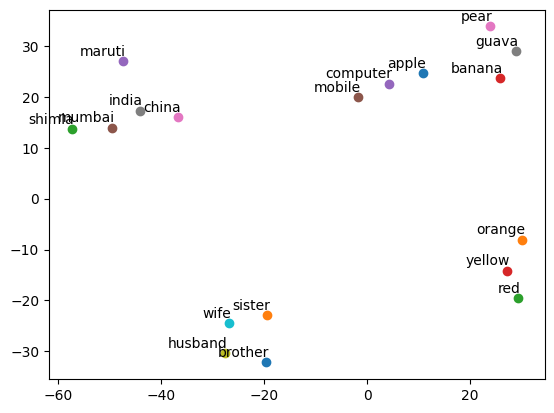

In [28]:
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(words[i],xy=(x[i],y[i]),
                 xytext=(2,2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')